HW2 - Falak Jain

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

1.

(i) Yes

(ii) about 8-10 hours

2. Sampling balls in a box with replacement

In [36]:
np.random.seed(2)
color = ['red', 'black','blue','yellow']
for _ in range(3):
    print(np.random.choice(color, size = 5, p=[0.25, 0.25, 0.25, 0.25],replace = True))

['black' 'red' 'blue' 'black' 'black']
['black' 'red' 'blue' 'black' 'black']
['blue' 'blue' 'red' 'blue' 'red']


3. Mean and Variance of X_bar

- It is given that X_i's are independant and identically distributed

- Mean X_bar = (X_1 + X_2 + ... X_n)/n where n is the number of records in the dataset

- Var(X_bar) = Var((X_1 + X_2 + ... X_n)/n) / n = 1/n^2 * Var(X1 + X2 + ... X_n)

- Given that X_i's are independant, we can say that the variance of the sum of all X_i = sum of variances of X_i

= 1/n^2 * (Var(X_1) + Var(X_2) + .... + Var(X_n))

= 1/n^2 * n * sigma^2 

= **sigma^2 / n**

4. LDA Model for Spam Detection

In [21]:
df_spam = pd.read_csv("spambase.data", header = None)

In [22]:
X,y = df_spam.iloc[:,0:57].values, df_spam.iloc[:,57].values

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state = 5,
                                                   stratify = y)

In [23]:
lda = LinearDiscriminantAnalysis().fit(X_train,y_train)
y_pred = lda.predict(X_test)
classification_error = np.mean(y_pred != y_test)
print(f'The classification error on the test set: {round(classification_error*100,2)}%')

The classification error on the test set: 12.05%


5. Plotting ROC curve and finding AUC for LDA Model

In [30]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc
fpr,tpr,threshold = roc_curve(y_test,lda.predict_proba(X_test)[:,1])
roc_auc = auc(fpr,tpr)
print(f'AUC of the LDA Model: {roc_auc}')

AUC of the LDA Model: 0.9472782566624208


<Figure size 432x288 with 0 Axes>

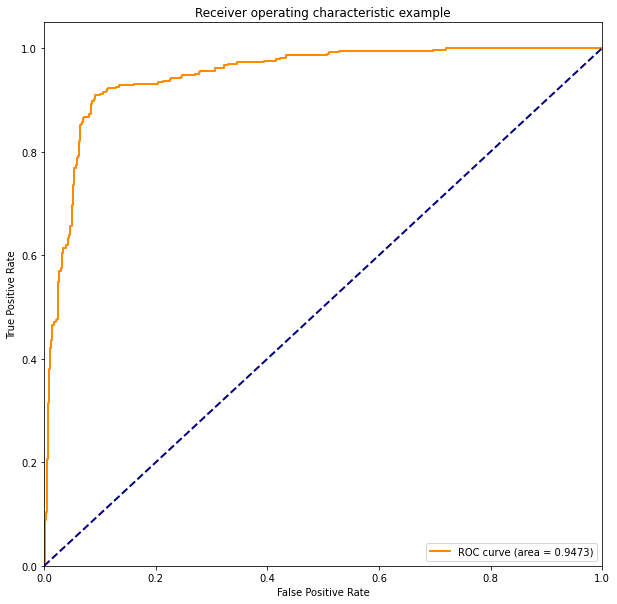

In [27]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # lw is linewidth
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()